# Human Protein Reference Database (Post-Translational Modifications) Data Formatting
This file takes data regarding kinase-protein interactions from the HPRD database and converts the data into the .gmt format. The data was retrieved from the HPRD database on Thu, Jun 15 2017 10:41:12. This data will be added to enhance the KEA2 database and will be suitably formatted for use by ENRICHR and X2K. The citation for this data is "Prasad, T. S. K. et al. (2009) Human Protein Reference Database - 2009 Update. Nucleic Acids Research. 37, D767-72." and can also be found on the corresponding gh.pages website.

## Import packages necessary for following program

In [17]:
%run /home/maayanlab/Desktop/Projects/KEA3/Scripts/init.ipy
%run /home/maayanlab/Desktop/Projects/KEA3/Scripts/Scripts.py

## Create a dataframe from a file containingthe HPRD Post-Translational Modification data

In [18]:
#Define colnames (as displayed in the associated README file)
colnames = ['substrate_hprd_id','substrate_gene_symbol',
            'substrate_isoform_id','substrate_refseq_id','site',
            'residue','enzyme_name','enzyme_hprd_id',
            'modification_type','experiment_type','reference_id(s)']

hprd_df = pd.read_table('~/Desktop/Projects/KEA3/POST_TRANSLATIONAL_MODIFICATIONS.txt'
                        , header = None, names = colnames)

hprd_df.head(100)

,substrate_hprd_id,substrate_gene_symbol,substrate_isoform_id,substrate_refseq_id,site,residue,enzyme_name,enzyme_hprd_id,modification_type,experiment_type,reference_id(s)
0,1,ALDH1A1,00001_1,NP_000680.2,2,S,-,-,Acetylation,in vitro,6427007
1,1,ALDH1A1,00001_1,NP_000680.2,128,K,-,-,Acetylation,in vivo,19608861
2,1,ALDH1A1,00001_1,NP_000680.2,91,K,-,-,Acetylation,in vivo,19608861
3,1,ALDH1A1,00001_1,NP_000680.2,353,K,-,-,Acetylation,in vivo,19608861
4,1,ALDH1A1,00001_1,NP_000680.2,419,K,-,-,Acetylation,in vivo,19608861
5,1,ALDH1A1,00001_1,NP_000680.2,495,K,-,-,Acetylation,in vivo,19608861
6,1,ALDH1A1,00001_1,NP_000680.2,252,K,-,-,Acetylation,in vivo,19608861
7,1,ALDH1A1,00001_1,NP_000680.2,367,K,-,-,Acetylation,in vivo,19608861
8,1,ALDH1A1,00001_1,NP_000680.2,410,K,-,-,Acetylation,in vivo,19608861
9,1,ALDH1A1,00001_1,NP_000680.2,435,K,-,-,Acetylation,in vivo,19608861


## Filter by columns necessary for .GMT and .SIG file formats

Although not needed for .gmt files, the 'modification_type' column is included so that we can also selectively filter phosphorylations (i.e. protein-kinase interactions). We will also be extracting the reference ids for later use when creating the .sig files.

In [19]:
df = hprd_df[['substrate_gene_symbol', 'enzyme_name', 
              'modification_type', 'reference_id(s)']]

df.head()

,substrate_gene_symbol,enzyme_name,modification_type,reference_id(s)
0,ALDH1A1,-,Acetylation,6427007
1,ALDH1A1,-,Acetylation,19608861
2,ALDH1A1,-,Acetylation,19608861
3,ALDH1A1,-,Acetylation,19608861
4,ALDH1A1,-,Acetylation,19608861


## Drop all without enzyme name and not pertaining to phosphorylation
Once done, remove column pertaining to 'modification_type'

In [20]:
#Determine which rows pertain to phosphorylation and have an enzyme name
indices = [index for index, rowData in df.iterrows()
         if str(rowData['enzyme_name']) != '-' 
           and rowData['modification_type'] == 'Phosphorylation']

#Filter dataframe
df = df.loc[indices]

#drop duplicate rows in the dataframe
df.drop_duplicates(inplace = True)

#drop all rows with an 'NaN' value for the kinases
df.dropna(axis = 0, inplace = True)

#Drop 'modification_type' since no longer needed
df.drop('modification_type', axis=1, inplace = True)

#View dataframe
df.head()

,substrate_gene_symbol,enzyme_name,reference_id(s)
59,ACTN1,PTK2,"11369769,16291744"
335,STAT3,FGFR3,"11940572,11294897,10918587,12244095,11350938,1..."
336,STAT3,FGFR3,"11350938,12626508,8626374,12576423,12244095,10..."
337,STAT3,FGFR4,"11940572,11294897,10918587,12244095,11350938,1..."
338,STAT3,FGFR4,"11350938,12626508,8626374,12576423,12244095,10..."


## Specify organism of enzyme as Homo sapiens

In [21]:
#Add 'Homo sapiens' as organism for each enzyme
df.insert(0, 'kinase_organism', ['_'.join([enzyme, 'Homo sapiens']) 
                                for index, enzyme in 
                                df.enzyme_name.iteritems()])

#Drop redundant 'enzyme_name' column
df.drop('enzyme_name', axis = 1, inplace = True)

In [22]:
#drop duplicate rows in the dataframe
df.drop_duplicates(['substrate_gene_symbol', 'kinase_organism'], inplace = True)

#drop any resulting NaNs in the dataframe
df.dropna(inplace = True)

#View dataframe
df.head()

,kinase_organism,substrate_gene_symbol,reference_id(s)
59,PTK2_Homo sapiens,ACTN1,"11369769,16291744"
335,FGFR3_Homo sapiens,STAT3,"11940572,11294897,10918587,12244095,11350938,1..."
337,FGFR4_Homo sapiens,STAT3,"11940572,11294897,10918587,12244095,11350938,1..."
339,HCK_Homo sapiens,STAT3,"11940572,11294897,10918587,12244095,11350938,1..."
341,JAK1_Homo sapiens,STAT3,"11940572,11294897,10918587,12244095,11350938,1..."


In [23]:
#Drop unnecessary 'reference_ids(s)' column
df_filter = df.drop('reference_id(s)', axis = 1)

#View dataframe
df_filter.head()

,kinase_organism,substrate_gene_symbol
59,PTK2_Homo sapiens,ACTN1
335,FGFR3_Homo sapiens,STAT3
337,FGFR4_Homo sapiens,STAT3
339,HCK_Homo sapiens,STAT3
341,JAK1_Homo sapiens,STAT3


## Set index to 'Kinase_Organism' and Aggregate Kinase Targets

In [24]:
#set index to 'kinase_organism'
df_filter.set_index('kinase_organism')

#Group kinases in dataframe 'kin'
#Aggregate data in 'kin' according to kinase groups
kin = df_filter.groupby('kinase_organism').agg(lambda x: tuple(x))

#Create a new column with 'HPRD' as description of data
kin.insert(0, 'Description', 'HPRD Post-Translational Modification')

#View Dataframe
kin.head()

,Description,substrate_gene_symbol
kinase_organism,,
ABL1_Homo sapiens,HPRD Post-Translational Modification,"(CD19, CDK5, JAK2, MAPT, CRK, MDM2, JUN, PTPN6..."
ABL2_Homo sapiens,HPRD Post-Translational Modification,"(CAT, CRK, GPX1)"
ACVR1B_Homo sapiens,HPRD Post-Translational Modification,"(SMAD2,)"
ACVR1_Homo sapiens,HPRD Post-Translational Modification,"(SMAD1,)"
ADRBK1_Homo sapiens,HPRD Post-Translational Modification,"(ADRA2A, BDKRB2, FPR1, MC4R, SNCA, OPRD1, RPLP..."


# Exploratory Data Analysis

## Calculate Number of Protein targets for each kinase

In [25]:
# Create column representing counts of protein targets per kinase
kin['kinase_targets_num'] = [int(len(lst)) for kinase, lst in kin['substrate_gene_symbol'].iteritems()]

# Sort kinases from max to min according to number of protein targets each has
kin.sort_values(by = ['kinase_targets_num'], ascending= False, inplace=True)

# View dataframe
kin.head()

,Description,substrate_gene_symbol,kinase_targets_num
kinase_organism,,,
PRKACA_Homo sapiens,HPRD Post-Translational Modification,"(ADD1, ADD2, PSEN1, LRP1, ACLY, ATP2B1, ADRBK1...",119
CSNK2A1_Homo sapiens,HPRD Post-Translational Modification,"(APEX1, ARRB2, MS4A1, BRCA1, CASQ2, CTNNB1, CD...",112
PRKCA_Homo sapiens,HPRD Post-Translational Modification,"(ADRA1B, APLP2, ATP2B1, ATP2B2, ADRBK1, GJA1, ...",109
MAPK1_Homo sapiens,HPRD Post-Translational Modification,"(STAT3, CD19, SLC9A1, ARRB1, GJA1, ESR1, NR3C1...",72
CDK1_Homo sapiens,HPRD Post-Translational Modification,"(APLP2, CALD1, CSNK2A1, CSNK2B, CUX1, CDK1, CD...",72


## Create Histograms to display distribution of number of targets per kinase

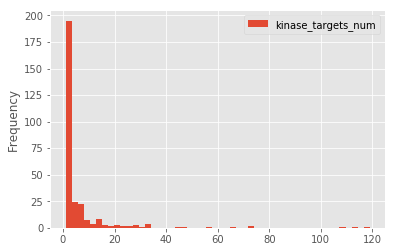

In [26]:
# Create histogram displaying the distribution of the number
#targets per kinase
kin.plot.hist(by = 'kinase_targets_num', bins = 50)

#Show histogram
plt.show()

## Filter Dataframe by the Number of Substrates for each Kinase
If the kinase has fewer than five targets, this kinase will not be included in the final .gmt file. Instead, its information will be carried over into a .sig file.

In [27]:
#Create list of indexes (kinase names) for kinases with fewer than five substrates
sig_key = [index for index, rowData in kin.kinase_targets_num.iteritems() if rowData < 5 ]

#Set indices for dataframe 'kin' of kinases with five or more substrates
indices = [index for index in kin.index if index not in sig_key]

#Create dataframe of only kinases with five or more substrates
sig = df.set_index('kinase_organism').loc[indices]

#Reset index of new dataframe
sig.reset_index(inplace = True)

#Rename columns of this dataframe to match .sig format
colnames = ['Source', 'Substrate', 'PubMed_ID']
sig.columns = colnames

#Insert first four columns for .sig file format (NaNs)
sig.insert(1, 'NA-1', str(np.nan))
sig.insert(2, 'NA-2', str(np.nan))
sig.insert(3, 'NA-3', str(np.nan))
sig.insert(4, 'NA-4', str(np.nan))

#Insert column corresponding to sign (with '?' because it is unknown)
sig.insert(6, 'Sign', '?')

#Insert column specifying interaction type as phosphorylation
sig.insert(7, 'Interaction', 'Phosphorylation')

#View dataframe
sig.head(181)

,Source,NA-1,NA-2,NA-3,NA-4,Substrate,Sign,Interaction,PubMed_ID
0,PRKACA_Homo sapiens,nan,nan,nan,nan,ADD1,?,Phosphorylation,8810272
1,PRKACA_Homo sapiens,nan,nan,nan,nan,ADD2,?,Phosphorylation,"9679146,8810272,19664994,18452278"
2,PRKACA_Homo sapiens,nan,nan,nan,nan,PSEN1,?,Phosphorylation,14576165
3,PRKACA_Homo sapiens,nan,nan,nan,nan,LRP1,?,Phosphorylation,"11158305,19651622"
4,PRKACA_Homo sapiens,nan,nan,nan,nan,ACLY,?,Phosphorylation,"10653665,18669648,19415658,17924679,18088087,1..."
5,PRKACA_Homo sapiens,nan,nan,nan,nan,ATP2B1,?,Phosphorylation,"2548572,18669648,19651622,20068231"
6,PRKACA_Homo sapiens,nan,nan,nan,nan,ADRBK1,?,Phosphorylation,11278469
7,PRKACA_Homo sapiens,nan,nan,nan,nan,CACNA1C,?,Phosphorylation,8664319
8,PRKACA_Homo sapiens,nan,nan,nan,nan,ATF1,?,Phosphorylation,"8663317,20068231"
9,PRKACA_Homo sapiens,nan,nan,nan,nan,CREM,?,Phosphorylation,8404858


In [28]:
#Remove kinases with fewer than five substrates in 'kin'
kin = kin.loc[indices]

## Create .Sig File

In [29]:
#Create dictionary 'sigd' with index numbers as keys
sigd = dict([(key, '') for key in sig.index])

# loop through rows with iterrows()
for index, rowData in sig.iterrows():
    line = ('\t'.join(rowData))
    sigd[index] = line
    
#Transfer tab-separated info into a new txt file
#Make sure to include in ReadMe corresponding column names
with open('HPRDsig.txt', 'w') as openfile:
    for index in sigd:
        openfile.write(str(sigd[index]) + '\n')

## Create File of 'df' for Later Data Aggregation
File will later be used to create .gmt file combining all databases

In [30]:
#index by gene sets with no fewer than 5 genes
i = [index for index, rowData in df.kinase_organism.iteritems()
     if rowData not in sig_key]

#filter the df by index 'i'
df = df.loc[i]

#Create dictionary 'd' with index numbers as keys
d = dict([(key, '') for key in df.index])

# loop through rows with iterrows()
for index, rowData in df.iterrows():
    line = ('\t'.join(rowData))
    d[index] = line
    
#Transfer tab-separated info into a new txt file
with open('Uncondensed_HPRD.txt', 'w') as openfile:
    for index in d:
        openfile.write(str(d[index]) + '\n')

# Creation of Final . GMT File

## Create Dictionary of Tab-Separated Rows of the Filtered Dataframe

In [31]:
#Reset index of the dataframe
kin.reset_index(inplace = True)

#create column 'target_symbol_merged' in which all 'target_symbol' elements are joined by a \t symbol
kin['target_symbol_merged'] = ['\t'.join(x) for x in kin['substrate_gene_symbol']]

#drop the now-unneccesary column 'substrate_gene_symbol' and 'kinase_targets_num'
kin.drop('substrate_gene_symbol', axis=1, inplace = True)
kin.drop('kinase_targets_num', axis=1, inplace = True)

#Create dictionary 'HPRD' with index numbers as keys
HPRD_num = dict([(key, '') for key in kin.index])

# loop through rows with iterrows()
for index, rowData in kin.iterrows():
    line = ('\t'.join(rowData))
    HPRD_num[index] = line

## Write info from Dictionary into a .GMT file

In [32]:
#Transfer tab-separated info into a new txt file
with open('HPRD_PTM.gmt', 'w') as openfile:
    for index in HPRD_num:
        openfile.write(str(HPRD_num[index]) + '\n')